# 1. Handling Missing Data

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

### Create DataFrame

In [2]:
missing_data_df = pd.DataFrame(
    {
        "Students": ["Tom", "Peter",np.nan, "Mary", "Tom","King","Tom","Mary",np.nan],
        "Exam_Date": ["15/01/2021", "16/01/2021", "19/01/2021", "27/01/2021", "16/01/2021",
                      "16/01/2021", "16/01/2021", "16/01/2021", "16/01/2021"],
        "Math": [79.00, 67.00,np.nan, np.nan, 70.00,np.nan,90.00,76.00,np.nan],
        "Physics":[63.00, np.nan, 60.00, np.nan,84.00, 77.00,55.00,np.nan,66.00],
        "Computer":[np.nan,78.00, 57.00, 88.00, np.nan,np.nan,np.nan,70.00,np.nan],
    }
)

missing_data_df

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,NaN
1,Peter,16/01/2021,67.0,NaN,78.0
2,NaN,19/01/2021,NaN,60.0,57.0
3,Mary,27/01/2021,NaN,NaN,88.0
4,Tom,16/01/2021,70.0,84.0,NaN
5,King,16/01/2021,NaN,77.0,NaN
6,Tom,16/01/2021,90.0,55.0,NaN
7,Mary,16/01/2021,76.0,NaN,70.0
8,NaN,16/01/2021,NaN,66.0,NaN


###### Show null values and return false if not null

In [3]:
missing_data_df.isnull().head()

,Students,Exam_Date,Math,Physics,Computer
0,False,False,False,False,True
1,False,False,False,True,False
2,True,False,True,False,False
3,False,False,True,True,False
4,False,False,False,False,True


###### Show count of null values

In [4]:
missing_data_df.isnull().sum()

Students     2
Exam_Date    0
Math         4
Physics      3
Computer     5
dtype: int64

###### Show not null values and return true if not null

In [5]:
missing_data_df.notnull().head()

,Students,Exam_Date,Math,Physics,Computer
0,True,True,True,True,False
1,True,True,True,False,True
2,False,True,False,True,True
3,True,True,False,False,True
4,True,True,True,True,False


### 1.  Deleting records with missing values
###### Drop entire row with all values null

In [6]:
missing_data_df.dropna(how='all')

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,NaN
1,Peter,16/01/2021,67.0,NaN,78.0
2,NaN,19/01/2021,NaN,60.0,57.0
3,Mary,27/01/2021,NaN,NaN,88.0
4,Tom,16/01/2021,70.0,84.0,NaN
5,King,16/01/2021,NaN,77.0,NaN
6,Tom,16/01/2021,90.0,55.0,NaN
7,Mary,16/01/2021,76.0,NaN,70.0
8,NaN,16/01/2021,NaN,66.0,NaN


###### Drop column with any null value

In [7]:
missing_data_df.dropna(how='any',axis=1)

,Exam_Date
0,15/01/2021
1,16/01/2021
2,19/01/2021
3,27/01/2021
4,16/01/2021
5,16/01/2021
6,16/01/2021
7,16/01/2021
8,16/01/2021


###### Drop rows with any of specified columns have null

In [8]:
missing_data_df.dropna(subset=['Math', 'Physics'], how='any')

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,NaN
4,Tom,16/01/2021,70.0,84.0,NaN
6,Tom,16/01/2021,90.0,55.0,NaN


###### Drop rows with all of specified columns have null

In [9]:
missing_data_df.dropna(subset=['Math', 'Physics'], how='all')

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,NaN
1,Peter,16/01/2021,67.0,NaN,78.0
2,NaN,19/01/2021,NaN,60.0,57.0
4,Tom,16/01/2021,70.0,84.0,NaN
5,King,16/01/2021,NaN,77.0,NaN
6,Tom,16/01/2021,90.0,55.0,NaN
7,Mary,16/01/2021,76.0,NaN,70.0
8,NaN,16/01/2021,NaN,66.0,NaN


###### Drop row with a given number of null values

In [10]:
missing_data_df.dropna(axis=1,thresh=2)

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,NaN
1,Peter,16/01/2021,67.0,NaN,78.0
2,NaN,19/01/2021,NaN,60.0,57.0
3,Mary,27/01/2021,NaN,NaN,88.0
4,Tom,16/01/2021,70.0,84.0,NaN
5,King,16/01/2021,NaN,77.0,NaN
6,Tom,16/01/2021,90.0,55.0,NaN
7,Mary,16/01/2021,76.0,NaN,70.0
8,NaN,16/01/2021,NaN,66.0,NaN


### 2. Imputation
###### Replace null values with a scalar value

In [11]:
missing_data_df.fillna(-999) # replace null values with -999

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,-999.0
1,Peter,16/01/2021,67.0,-999.0,78.0
2,-999,19/01/2021,-999.0,60.0,57.0
3,Mary,27/01/2021,-999.0,-999.0,88.0
4,Tom,16/01/2021,70.0,84.0,-999.0
5,King,16/01/2021,-999.0,77.0,-999.0
6,Tom,16/01/2021,90.0,55.0,-999.0
7,Mary,16/01/2021,76.0,-999.0,70.0
8,-999,16/01/2021,-999.0,66.0,-999.0


###### Backward Fill

In [12]:
missing_data_df.fillna(method='bfill') 

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,78.0
1,Peter,16/01/2021,67.0,60.0,78.0
2,Mary,19/01/2021,70.0,60.0,57.0
3,Mary,27/01/2021,70.0,84.0,88.0
4,Tom,16/01/2021,70.0,84.0,70.0
5,King,16/01/2021,90.0,77.0,70.0
6,Tom,16/01/2021,90.0,55.0,70.0
7,Mary,16/01/2021,76.0,66.0,70.0
8,NaN,16/01/2021,NaN,66.0,NaN


###### Forward Fill

In [13]:
missing_data_df.fillna(method='ffill')

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,NaN
1,Peter,16/01/2021,67.0,63.0,78.0
2,Peter,19/01/2021,67.0,60.0,57.0
3,Mary,27/01/2021,67.0,60.0,88.0
4,Tom,16/01/2021,70.0,84.0,88.0
5,King,16/01/2021,70.0,77.0,88.0
6,Tom,16/01/2021,90.0,55.0,88.0
7,Mary,16/01/2021,76.0,55.0,70.0
8,Mary,16/01/2021,76.0,66.0,70.0


###### Impute null value with statistical measures

In [14]:
missing_data_df.fillna(missing_data_df.Math.mean()) # fillna null value in Math column with mean of the Math
missing_data_df.fillna(missing_data_df.Students.mode()) # fillna null value in Students column with mode of the Students
missing_data_df.fillna(missing_data_df.Computer.median()) # fillna null value in Computer column with median of the Computer

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,74.0
1,Peter,16/01/2021,67.0,74.0,78.0
2,74,19/01/2021,74.0,60.0,57.0
3,Mary,27/01/2021,74.0,74.0,88.0
4,Tom,16/01/2021,70.0,84.0,74.0
5,King,16/01/2021,74.0,77.0,74.0
6,Tom,16/01/2021,90.0,55.0,74.0
7,Mary,16/01/2021,76.0,74.0,70.0
8,74,16/01/2021,74.0,66.0,74.0


### 3. Interpolate missing values
###### Interpolate missing data in forward direction

In [15]:
missing_data_df.interpolate(method='linear', limit_direction ='forward')

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,NaN
1,Peter,16/01/2021,67.0,61.5,78.0
2,NaN,19/01/2021,68.0,60.0,57.0
3,Mary,27/01/2021,69.0,72.0,88.0
4,Tom,16/01/2021,70.0,84.0,83.5
5,King,16/01/2021,80.0,77.0,79.0
6,Tom,16/01/2021,90.0,55.0,74.5
7,Mary,16/01/2021,76.0,60.5,70.0
8,NaN,16/01/2021,76.0,66.0,70.0


###### Interpolate missing data in backward direction

In [16]:
missing_data_df.interpolate(method='linear', limit_direction ='backward')

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,78.0
1,Peter,16/01/2021,67.0,61.5,78.0
2,NaN,19/01/2021,68.0,60.0,57.0
3,Mary,27/01/2021,69.0,72.0,88.0
4,Tom,16/01/2021,70.0,84.0,83.5
5,King,16/01/2021,80.0,77.0,79.0
6,Tom,16/01/2021,90.0,55.0,74.5
7,Mary,16/01/2021,76.0,60.5,70.0
8,NaN,16/01/2021,NaN,66.0,NaN


### 4. Model-based techniques
###### Nearest neighbors imputation

In [17]:
from sklearn.impute import KNNImputer

In [18]:
missing_data_df

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,NaN
1,Peter,16/01/2021,67.0,NaN,78.0
2,NaN,19/01/2021,NaN,60.0,57.0
3,Mary,27/01/2021,NaN,NaN,88.0
4,Tom,16/01/2021,70.0,84.0,NaN
5,King,16/01/2021,NaN,77.0,NaN
6,Tom,16/01/2021,90.0,55.0,NaN
7,Mary,16/01/2021,76.0,NaN,70.0
8,NaN,16/01/2021,NaN,66.0,NaN


In [19]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputed_data=imputer.fit_transform(missing_data_df[['Math','Physics','Computer']].to_numpy())
imputed_data

array([[79. , 63. , 63.5],
       [67. , 73.5, 78. ],
       [84.5, 60. , 57. ],
       [71.5, 61.5, 88. ],
       [70. , 84. , 74. ],
       [74.5, 77. , 67.5],
       [90. , 55. , 63.5],
       [76. , 73.5, 70. ],
       [84.5, 66. , 67.5]])

In [20]:
pd.concat([missing_data_df[['Students','Exam_Date']],pd.DataFrame(imputed_data,columns=['Math','Physics','Computer'])],axis=1)

,Students,Exam_Date,Math,Physics,Computer
0,Tom,15/01/2021,79.0,63.0,63.5
1,Peter,16/01/2021,67.0,73.5,78.0
2,NaN,19/01/2021,84.5,60.0,57.0
3,Mary,27/01/2021,71.5,61.5,88.0
4,Tom,16/01/2021,70.0,84.0,74.0
5,King,16/01/2021,74.5,77.0,67.5
6,Tom,16/01/2021,90.0,55.0,63.5
7,Mary,16/01/2021,76.0,73.5,70.0
8,NaN,16/01/2021,84.5,66.0,67.5


# 2. Handling Imbalanced Data

### Load Data

In [21]:
import matplotlib.pyplot as plt

titanic_df=pd.read_csv('titanic.csv')
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### Check for Class Imbalance in Data

<AxesSubplot:>

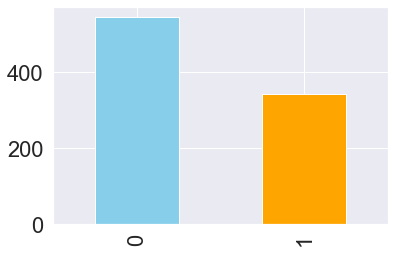

In [22]:
titanic_df['Survived'].value_counts().plot(kind='bar',color=['skyblue','orange'])

## 1. K-Fold Cross-Validation
Sklearn has KFold(n_splits=5, *, shuffle=False, random_state=None) class that splits the dataset into k consecutive folds (without shuffling by default). the n_splits sets the number of folds. 
### Let's fit a regression model on titanic data with KFold cross validation

In [23]:
# import required libraries
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
#Get features and target variables from data
X=titanic_df[['Pclass','Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']]
y=titanic_df['Survived']
# prepare cross-validation data with 10 folds
cv=KFold(n_splits=10, shuffle=True, random_state=1)
# model
model=LogisticRegression()
#Evaluate model with cv
score=cross_val_score(model,X,y,scoring='accuracy',cv=cv)
print('Min Accuracy %.2f'% (score.min()*100),'%')
print('Max Accuracy %.2f'% (score.max()*100),'%')
print('Mean Accuracy %.2f'% (np.mean(score)*100),'%')

Min Accuracy 62.92 %
Max Accuracy 77.27 %
Mean Accuracy 69.57 %


### Let's determine the value of k (folds) with higher acuracy

In [24]:
def model_evaluation(cv,X,y):
    model=LogisticRegression()
    score=cross_val_score(model,X,y,scoring='accuracy',cv=cv)
    return score.min(), score.max(),np.mean(score)
    
folds=range(2,21)
min_cv,max_cv,mean_cv=list(),list(),list()
#iterate through each value of fold/k
for k in folds:
    cv=KFold(n_splits=k,shuffle=True,random_state=1)
    k_min,k_max,k_mean=model_evaluation(cv,X,y)
    min_cv.append(k_min*100),max_cv.append(k_max*100),mean_cv.append(k_mean*100)
    print('Folds=%d || Min Acc. %.2f || Max Acc. %.2f || Mean Acc.%.2f' % (k,k_min,k_max,k_mean))

Folds=2 || Min Acc. 0.67 || Max Acc. 0.71 || Mean Acc.0.69
Folds=3 || Min Acc. 0.67 || Max Acc. 0.71 || Mean Acc.0.70
Folds=4 || Min Acc. 0.66 || Max Acc. 0.71 || Mean Acc.0.70
Folds=5 || Min Acc. 0.66 || Max Acc. 0.72 || Mean Acc.0.69
Folds=6 || Min Acc. 0.67 || Max Acc. 0.73 || Mean Acc.0.70
Folds=7 || Min Acc. 0.65 || Max Acc. 0.73 || Mean Acc.0.69
Folds=8 || Min Acc. 0.63 || Max Acc. 0.75 || Mean Acc.0.69
Folds=9 || Min Acc. 0.65 || Max Acc. 0.74 || Mean Acc.0.69
Folds=10 || Min Acc. 0.63 || Max Acc. 0.77 || Mean Acc.0.70
Folds=11 || Min Acc. 0.65 || Max Acc. 0.76 || Mean Acc.0.69
Folds=12 || Min Acc. 0.64 || Max Acc. 0.77 || Mean Acc.0.70
Folds=13 || Min Acc. 0.65 || Max Acc. 0.76 || Mean Acc.0.69
Folds=14 || Min Acc. 0.65 || Max Acc. 0.76 || Mean Acc.0.70
Folds=15 || Min Acc. 0.64 || Max Acc. 0.75 || Mean Acc.0.70
Folds=16 || Min Acc. 0.62 || Max Acc. 0.82 || Mean Acc.0.70
Folds=17 || Min Acc. 0.62 || Max Acc. 0.83 || Mean Acc.0.70
Folds=18 || Min Acc. 0.62 || Max Acc. 0.84 || Me

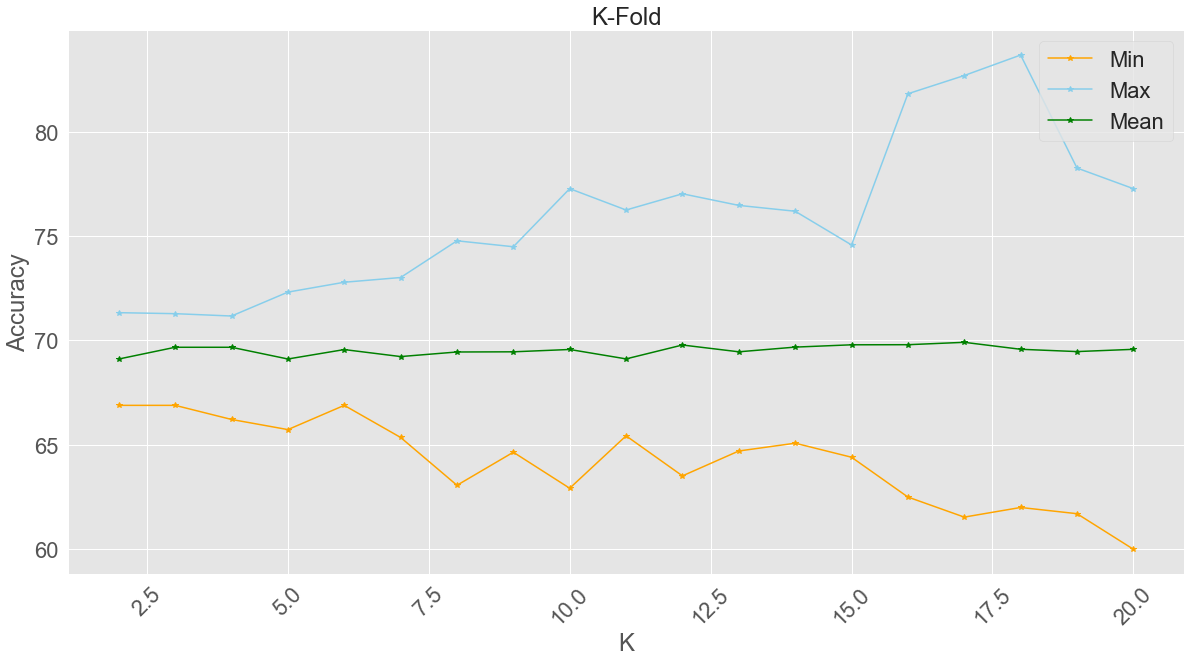

In [25]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') # Other sytles to use; fivethirtyeight

plt.figure(figsize=(20,10)) # Set figure size
plt.rcParams.update({'font.size': 22}) # Set axes size
plt.plot(folds,min_cv,color='orange',marker='*') # Plot the minimum accuracy
plt.plot(folds,max_cv,color='skyblue',marker='*') # Plot the maximum accuracy
plt.plot(folds,mean_cv,color='green',marker='*') # Plot the mean accuracy
plt.title('K-Fold',fontsize=24)
plt.xticks(rotation=45)
plt.xlabel('K',fontsize=24)
plt.ylabel('Accuracy',fontsize=24)
plt.legend(['Min','Max','Mean'], loc='upper right')
plt.show()

## 2. Oversampling

#### i. Simple random oversampling
We will use imbalanced-learn which is a python package for data re-sampling. To install imbalanced-learn open terminal and run

pip install imbalanced-learn

When using Anaconda run the below command on Anaconda prompt terminal 

conda install -c conda-forge imbalanced-learn

<AxesSubplot:>

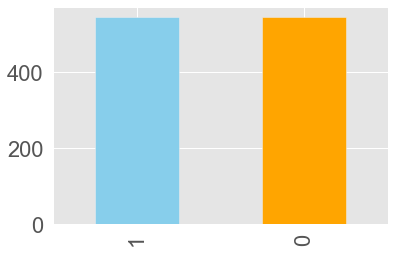

In [26]:
from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler()
X_resapmled,y_resampled=ros.fit_resample(X,y)
y_resampled.value_counts().plot(kind='bar',color=['skyblue','orange'])

#### ii. Oversampling by shrinkage
We use imbalanced-learn library which comes with RandomOverSampler classs but in this case we add shrinkage parameter

<AxesSubplot:>

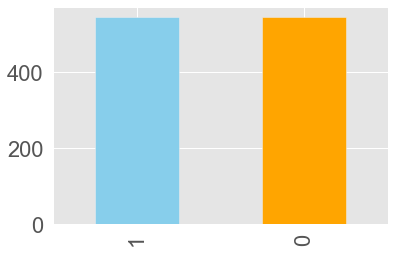

In [27]:
from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler(shrinkage=0.15)
X_resapmled,y_resampled=ros.fit_resample(X,y)
y_resampled.value_counts().plot(kind='bar',color=['skyblue','orange'])

#### iii. Oversampling with SMOTE
The imbalanced-learn package comes with SMOTE class for synthetic sampling

<AxesSubplot:>

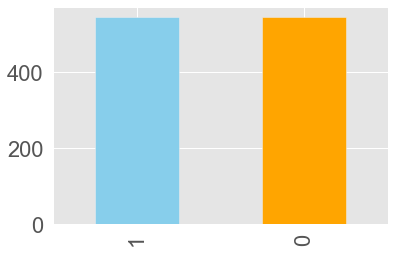

In [28]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()
X_resampled,y_resampled=smote.fit_resample(X,y)
y_resampled.value_counts().plot(kind='bar',color=['skyblue','orange'])

## 3. Undersampling

#### i. Simple random undersampling
We use imbalanced-learn which comes with RandomUnderSampler class for undersampling data

<AxesSubplot:>

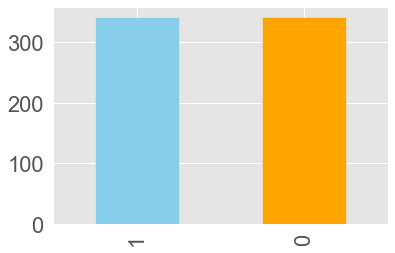

In [29]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler()
X_resampled,y_resampled=rus.fit_resample(X,y)
y_resampled.value_counts().plot(kind='bar',color=['skyblue','orange'])

#### ii. Undersampling with K-Means
The imbalanced-learn library contains the ClusterCentroids class for creating clusters for undersampling

<AxesSubplot:>

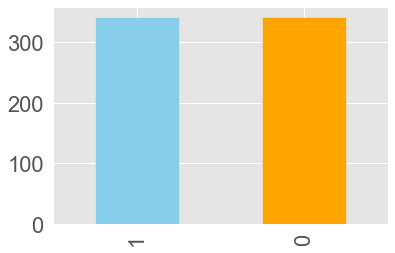

In [30]:
from imblearn.under_sampling import ClusterCentroids

cc=ClusterCentroids()
X_resampled,y_resampled=cc.fit_resample(X,y)
y_resampled.value_counts().plot(kind='bar',color=['skyblue','orange'])

#### iii. Undersampling using Tomek links
The imbalanced-learn library comes with TomekLinks class which we use for undersampling. 

Note that the resultant samples for each class are not the same. This is because Tomek Links only removes the samples from majority class that are close to minority class.

<AxesSubplot:>

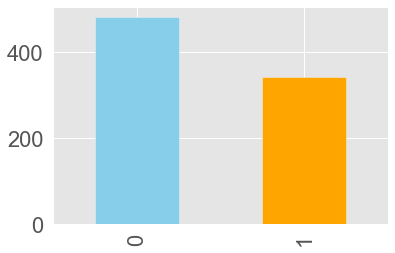

In [31]:
from imblearn.under_sampling import TomekLinks

tl=TomekLinks()
X_resampled,y_resampled=tl.fit_resample(X,y)
y_resampled.value_counts().plot(kind='bar',color=['skyblue','orange'])

## 4. Oversampling and Undersampling
To get a robust way to deal with imbalanced data we can combine both oversampling and undersampling techniques. The imbalanced-learn library comes with a SMOTETomek class which is used for oversampling and undersampling.

<AxesSubplot:>

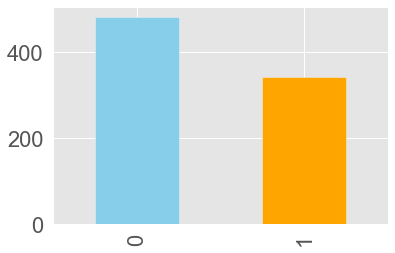

In [32]:
from imblearn.combine import SMOTETomek

st=SMOTETomek()
X_resampled,y_Resampled=st.fit_resample(X,y)
y_resampled.value_counts().plot(kind='bar',color=['skyblue','orange'])